In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

from collections import Counter
import string

In [2]:
columns = ["WikiID", "FreebaseID", "Name", "ReleaseDate", "BoxOfficeRevenue", "Runtime", "Languages", "Countries", "Genres"]
df_meta = pd.read_csv("movie.metadata.tsv", sep="\t", names=columns)
df_meta.loc[df_meta["WikiID"]==29666067, "ReleaseDate"] = "2010-12-02"
df_meta["ReleaseDate"] = pd.to_datetime(df_meta["ReleaseDate"])
df_meta = df_meta[~df_meta["ReleaseDate"].isna()]

In [3]:
df_synopsis = pd.read_csv("plot_summaries.txt", sep="\t", names=["WikiID", "synopsis"])
df = pd.merge(df_meta[["WikiID", "ReleaseDate"]], df_synopsis, on="WikiID")
df["ReleasePeriod"] = pd.qcut(df_meta["ReleaseDate"].dt.year, 10)
df.head(3)

,WikiID,ReleaseDate,synopsis,ReleasePeriod
0,975900,2001-08-24,"Set in the second half of the 22nd century, th...","(1994.0, 2001.0]"
1,9363483,1987-01-01,A series of murders of rich young women throug...,"(1994.0, 2001.0]"
2,261236,1983-01-01,"Eva, an upper class housewife, becomes frustra...","(1985.0, 1994.0]"


In [42]:
def plot_top_non_stopwords_barchart(texts):
    stop = set(stopwords.words('english') + ["one", "back", "two", "film", "ha", "wa"] + list(STOPWORDS))
    
    texts = texts.apply(lambda s: s.translate(str.maketrans('', '', string.punctuation)).lower()).str.split().values.tolist()
    lem = WordNetLemmatizer()
    corpus = [lem.lemmatize(word) for plot in texts for word in plot]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:80]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)
    plt.show()

(1887.999, 1933.0]


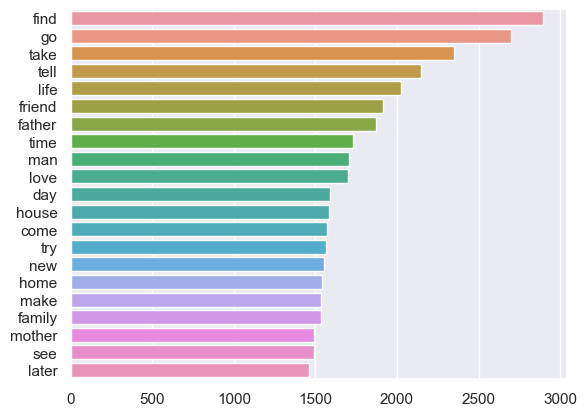

(1933.0, 1949.0]


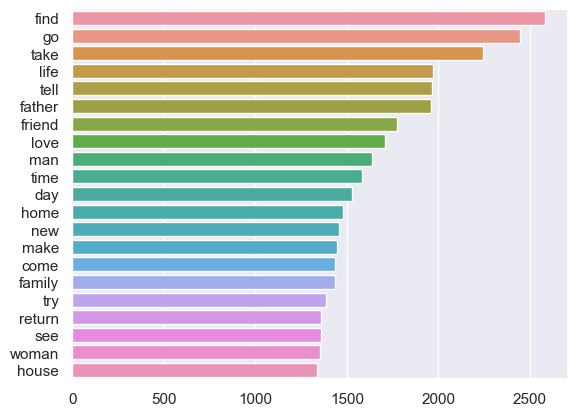

(1949.0, 1962.0]


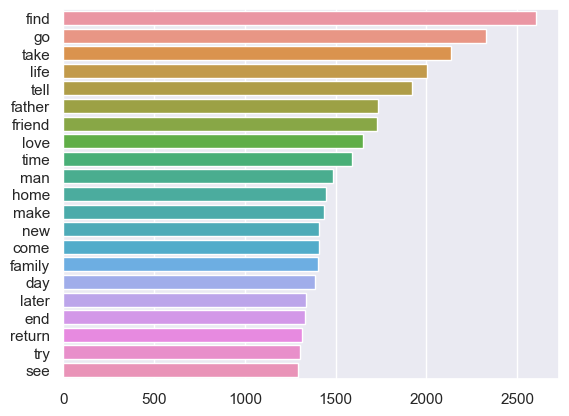

(1962.0, 1974.0]


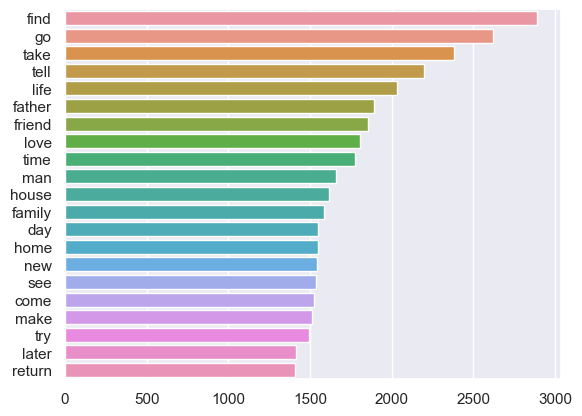

(1974.0, 1985.0]


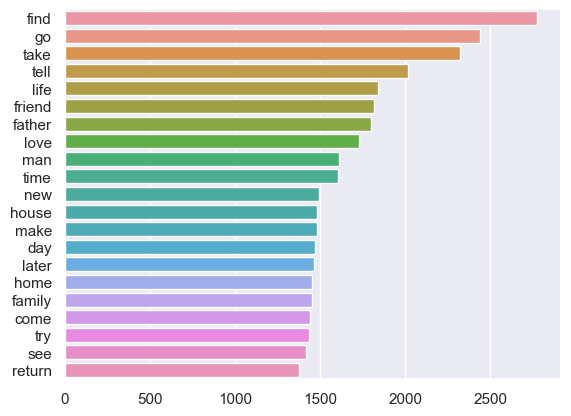

(1985.0, 1994.0]


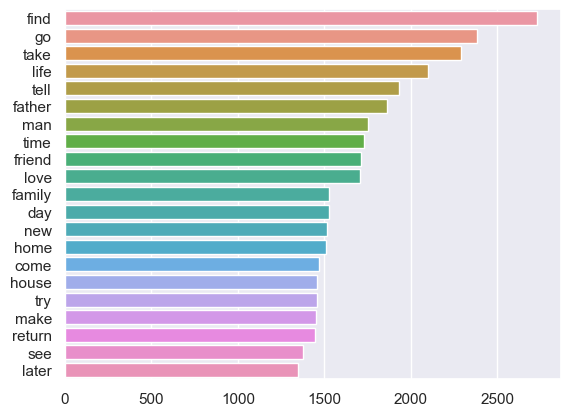

(1994.0, 2001.0]


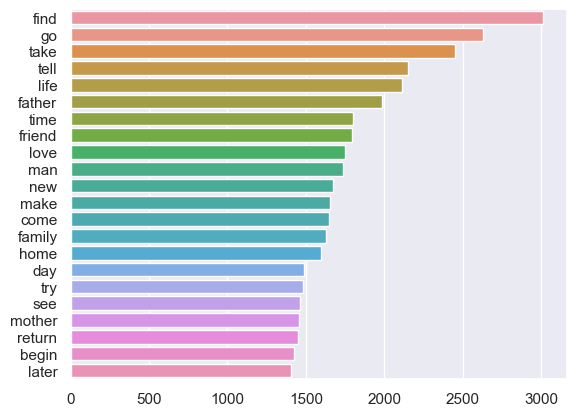

(2001.0, 2005.0]


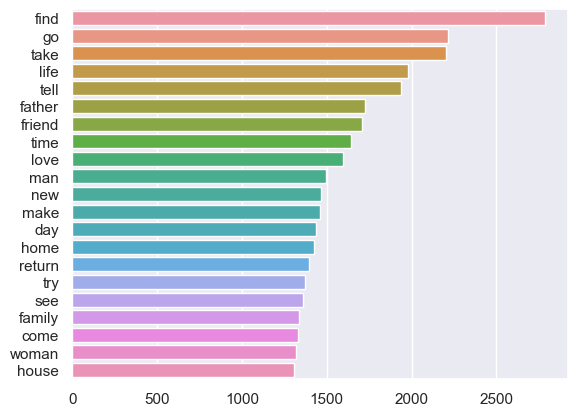

(2005.0, 2008.0]


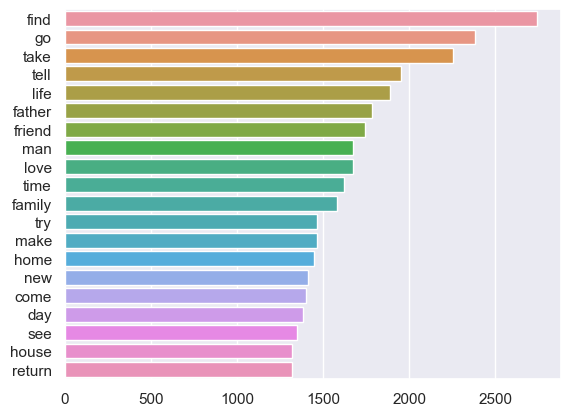

(2008.0, 2016.0]


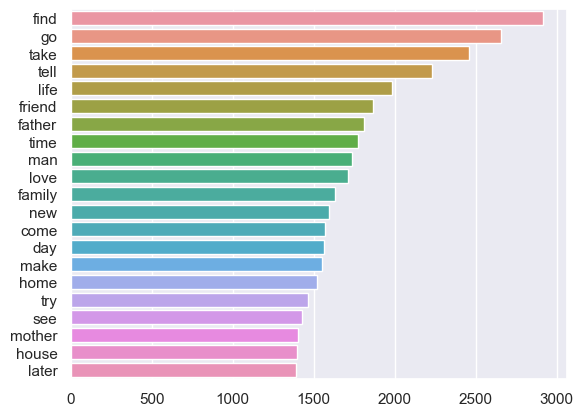

In [43]:
for period, indices in df.groupby("ReleasePeriod").groups.items():
    print(period)
    plot_top_non_stopwords_barchart(df.loc[indices, "synopsis"])